In [14]:
#import necessary library
import numpy as np 
import pandas as pd
import scipy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


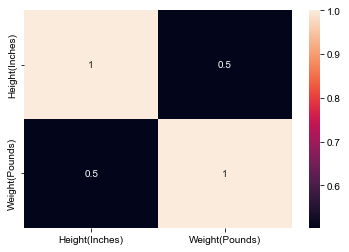

In [10]:
import seaborn as sns;
dff = df [['Height(Inches)', 'Weight(Pounds)']]
# Visualize the data using a heatmap
sns.heatmap (dff.corr(), annot = True) 
sns.set (rc = {'figure.figsize':(40, 40)})

In [11]:
#Preprocssing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [12]:
df.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [13]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [20]:
#Preprocessing Using MIN-MAX Scaling
array = df.values
X = array[:,0:8]
Y = array[:,:8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.000e+00 3.701e-01 3.765e-01]
 [4.000e-05 7.554e-01 6.294e-01]
 [8.000e-05 6.132e-01 8.074e-01]
 [1.200e-04 5.337e-01 6.923e-01]
 [1.600e-04 5.049e-01 7.134e-01]]


In [27]:
#Extract necessary features.
data_x = df.iloc[:,0]
data_y = df.iloc[:,1]
data_x, data_y

(0            1
 1            2
 2            3
 3            4
 4            5
          ...  
 24995    24996
 24996    24997
 24997    24998
 24998    24999
 24999    25000
 Name: Index, Length: 25000, dtype: int64,
 0        65.78331
 1        71.51521
 2        69.39874
 3        68.21660
 4        67.78781
            ...   
 24995    69.50215
 24996    64.54826
 24997    64.69855
 24998    67.52918
 24999    68.87761
 Name: Height(Inches), Length: 25000, dtype: float64)

Text(0, 0.5, 'Count')

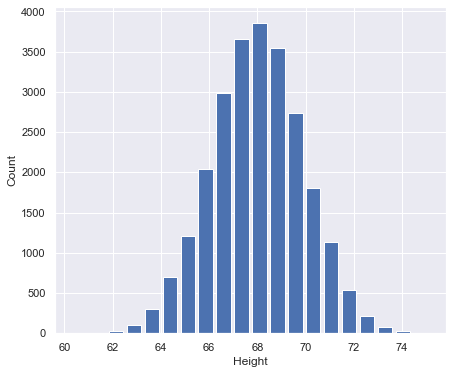

In [22]:
plt.figure(figsize=(7,6))
plt.hist(df['Height(Inches)'], bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

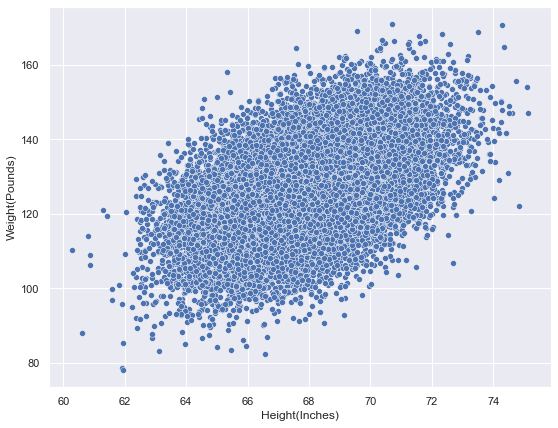

In [23]:
plt.figure(figsize=(9,7))
sns.scatterplot(df['Height(Inches)'], df['Weight(Pounds)'])

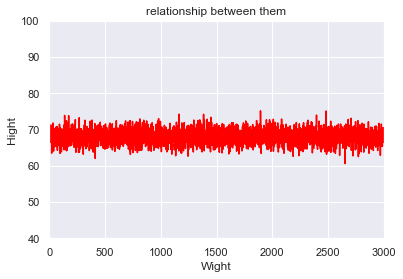

In [40]:
plt.figure()
plt.plot(data_x, data_y, c='red')
plt.xlabel("Wight")
plt.ylabel("Hight")
plt.title("relationship between them")
plt.axis([0,3000,40,100])
plt.grid(True)

In [59]:
#train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(data_x,data_y, random_state = 100, test_size = 0.3,train_size=0.7)
print('Row count of X_train table'+' - '+str(f"{len(X_train):,}"))
print('Row count of y_train table'+' - '+str(f"{len(y_train):,}"))
print('Row count of x_test table'+' - '+str(f"{len(X_test):,}"))
print('Row count of y_test table'+' - '+str(f"{len(y_test):,}"))

Row count of X_train table - 17,500
Row count of y_train table - 17,500
Row count of x_test table - 7,500
Row count of y_test table - 7,500


In [60]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
# Fitting the resgression line using 'OLS' 
lr = sm.OLS (y_train, X_train_sm).fit() 
# Printing the parameters
lr.params
# Linear regression summary 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Height(Inches)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0001372
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.991
Time:                        22:27:05   Log-Likelihood:                -36080.
No. Observations:               17500   AIC:                         7.216e+04
Df Residuals:                   17498   BIC:                         7.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.9993      0.029   2361.339      0.000      67.943      68.056
Index      -2.337e-08      2e-06     -0.012      0.991   -3.93e-06    3.89e-06
==============================================================================
Omnibus:                        0.755   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.778
Skew:                          -0.013   Prob(JB):                        0.678
Kurtosis:                       2.980   Cond. No.                     2.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

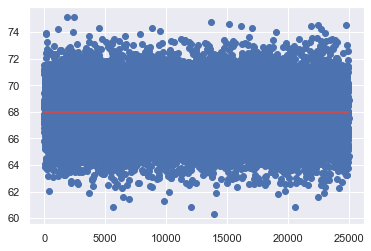

In [61]:
#Plot the regression line 
import matplotlib.pyplot as plt 
fig.set_size_inches(10,10)
fig=plt.gcf() 
plt.plot(X_train, 67.9993 + (-2.337e-08)*X_train, 'r')  
plt.scatter(X_train, y_train) 
plt.show()

In [62]:
x_train = X_train.reshape(-1, 1)
x_test = X_test.reshape(-1, 1)
model = LinearRegression()
model.fit(data_x.reshape(-1,1), data_y)
plt.figure()
plt.plot(data_x, data_y, 'k.')
plt.xlabel("Daimater (In Inches)")
plt.ylabel("Price(In Dollars)")
plt.title("Pizza price plotted against diameter")
plt.axis([0,3000,0,200])
plt.plot(model.predict([[int(x)] for x in range(25000)]))
plt.grid(True)

AttributeError: 'Series' object has no attribute 'reshape'